In [1]:

# Imports
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import toml
from sklearn import preprocessing, model_selection, metrics
import seaborn as sns
import random


import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use("seaborn-v0_8-whitegrid")
from scipy.special import logit, expit, erf
import os

#import verstack
random.seed(42)
from scipy import stats
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams.update({
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    })



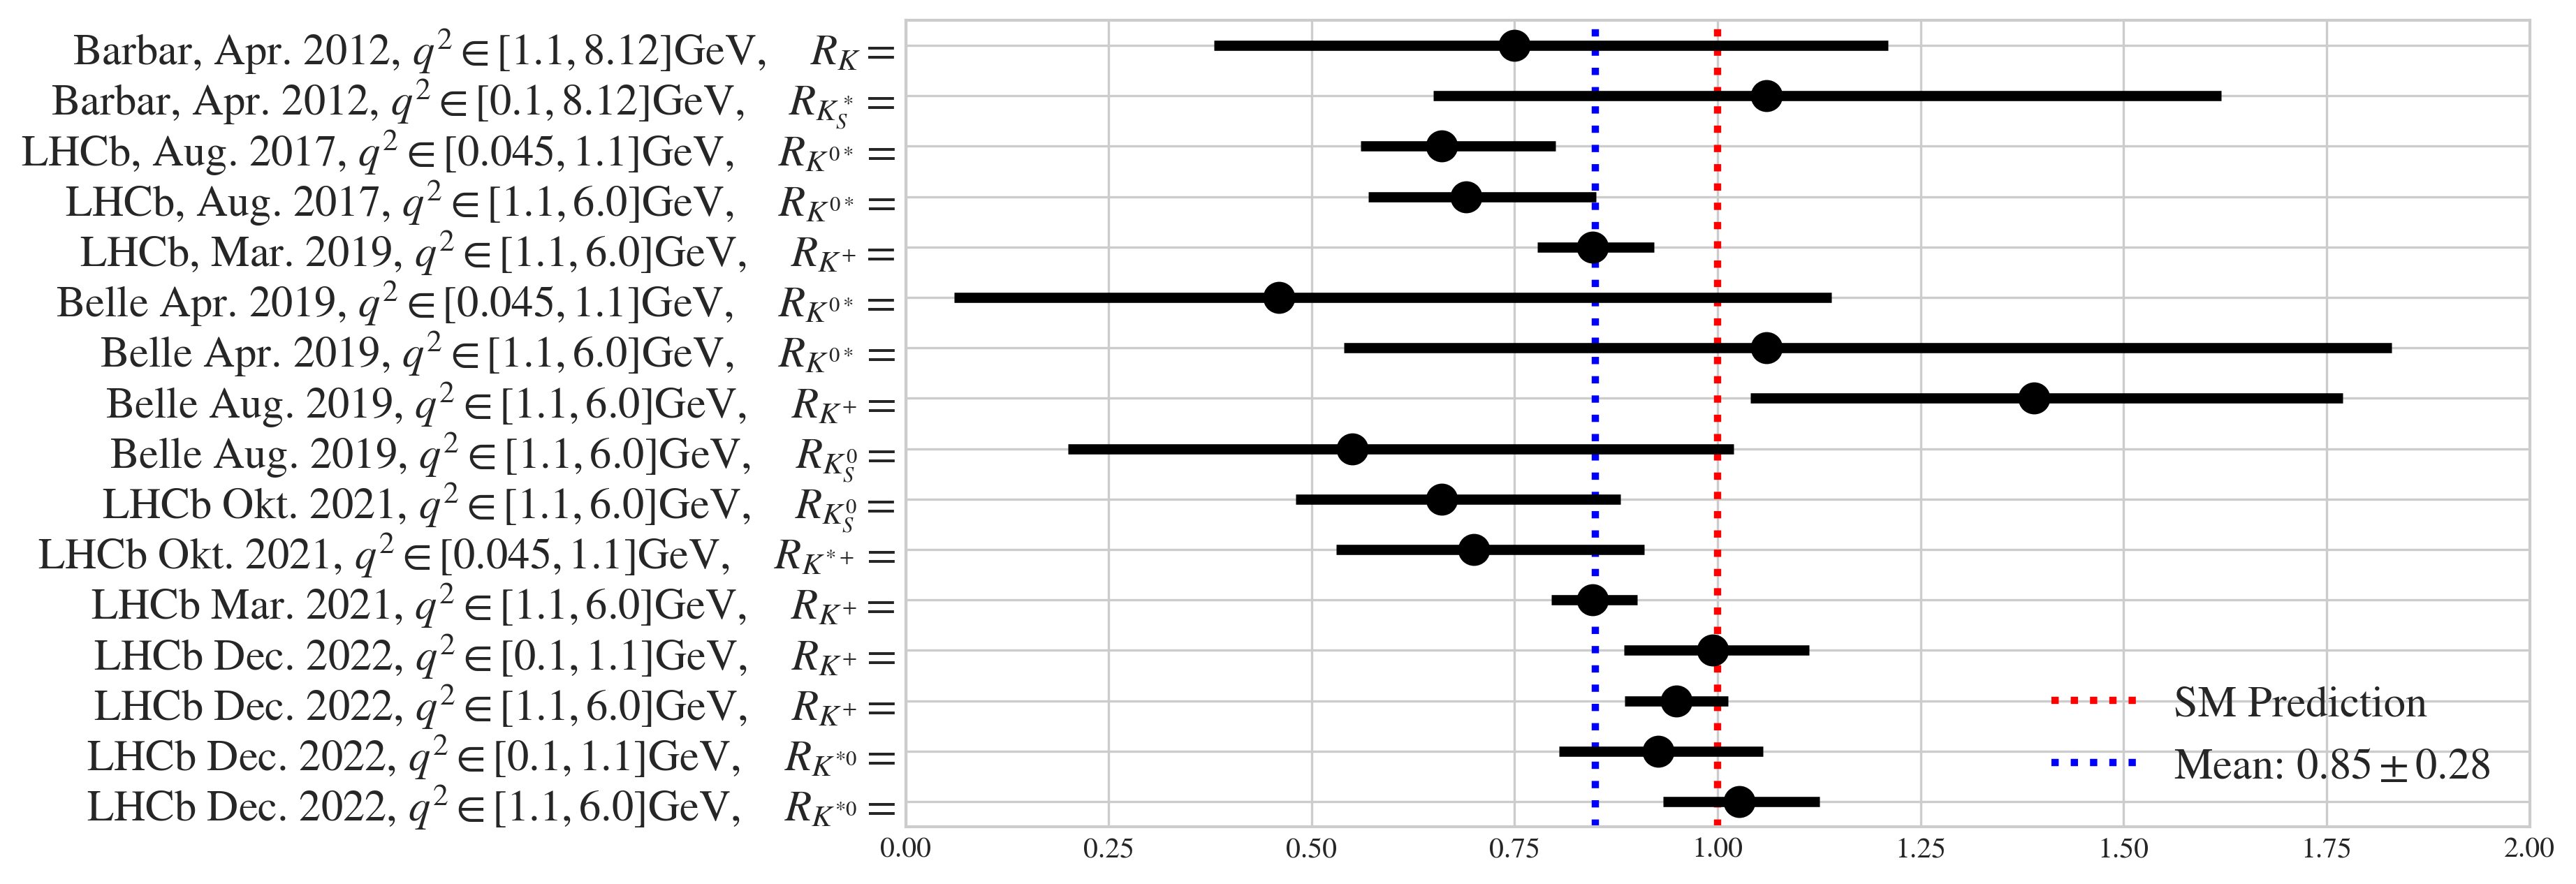

In [125]:
{'Barbar': {'RK1': [0.75,0.4+0.06,0.31+0.06],
            'RK2': [1.06, 0.48+0.08,0.33+0.08],
            }
 
 
 }

fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_subplot(111)
ticks = np.arange(0,16,1)

ax.set_yticks(ticks)
dic = {15: "Barbar, Apr. 2012, $q^2\in[1.1,8.12]$GeV,    $R_K=$",
       14: "Barbar, Apr. 2012, $q^2\in[0.1,8.12]$GeV,    $R_{K^*_S}=$",
       13: "LHCb, Aug. 2017, $q^2\in[0.045,1.1]$GeV,    $R_{K^{0*}}=$",
       12: "LHCb, Aug. 2017, $q^2\in[1.1,6.0]$GeV,    $R_{K^{0*}}=$",
       11: "LHCb, Mar. 2019, $q^2\in[1.1,6.0]$GeV,    $R_{K^{+}}=$",
       10: "Belle Apr. 2019, $q^2\in[0.045,1.1]$GeV,    $R_{K^{0*}}=$",
        9: "Belle Apr. 2019, $q^2\in[1.1,6.0]$GeV,    $R_{K^{0*}}=$",
        8: "Belle Aug. 2019, $q^2\in[1.1,6.0]$GeV,    $R_{K^{+}}=$",
        7: "Belle Aug. 2019, $q^2\in[1.1,6.0]$GeV,    $R_{K_S^0}=$",
        6: "LHCb Okt. 2021, $q^2\in[1.1,6.0]$GeV,    $R_{K_S^0}=$",
        5: "LHCb Okt. 2021, $q^2\in[0.045,1.1]$GeV,    $R_{K^{*+}}=$",
        4: "LHCb Mar. 2021, $q^2\in[1.1,6.0]$GeV,    $R_{K^{+}}=$",
        3: "LHCb Dec. 2022, $q^2\in[0.1,1.1]$GeV,    $R_{K^{+}}=$",
        2: "LHCb Dec. 2022, $q^2\in[1.1,6.0]$GeV,    $R_{K^{+}}=$",
        1: "LHCb Dec. 2022, $q^2\in[0.1,1.1]$GeV,    $R_{K^{*0}}=$",
        0: "LHCb Dec. 2022, $q^2\in[1.1,6.0]$GeV,    $R_{K^{*0}}=$"


       }
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]
ax.set_yticklabels(labels,fontsize=15)
ax.vlines(1,-0.5,15.5,color='red',lw=2.5,ls=':',label='SM Prediction')
ax.vlines(np.mean([0.8491440079315901]),-0.5,15.5,color='blue',lw=2.5,ls=':', label=f"Mean: $0.85 \pm 0.28$")
ax.set_ylim(-0.5,15.5)
ax.set_xlim(0,2)
ax.errorbar(x=0.75,y=15,xerr=np.array([[0.31+0.06,0.4+0.06]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=1.06,y=14,xerr=np.array([[0.33+0.08,0.48+0.08]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.66,y=13,xerr=np.array([[0.07+0.03,0.11+0.03]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.69,y=12,xerr=np.array([[0.07+0.05,0.11+0.05]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.846,y=11,xerr=np.array([[0.054+0.014,0.060+0.016]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.46,y=10,xerr=np.array([[0.27+0.13,0.55+0.13]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=1.06,y=9,xerr=np.array([[0.38+0.14,0.63+0.14]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=1.39,y=8,xerr=np.array([[0.33+0.02,0.36+0.02]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.55,y=7,xerr=np.array([[0.34+0.01,0.46+0.01]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.66,y=6,xerr=np.array([[0.14+0.04,0.2+0.02]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.70,y=5,xerr=np.array([[0.13+0.04,0.18+0.03]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.846,y=4,xerr=np.array([[0.039+0.012,0.042+0.013]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.994,y=3,xerr=np.array([[0.082+0.027,0.09+0.029]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.949,y=2,xerr=np.array([[0.041+0.022,0.042+0.022]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.errorbar(x=0.927,y=1,xerr=np.array([[0.087+0.035,0.093+0.036]]).T,fmt='o',color='black',lw = 3.5,markersize=10)
ax.errorbar(x=1.027,y=0,xerr=np.array([[0.068+0.026,0.072+0.027]]).T,fmt='o', color='black',lw = 3.5,markersize=10)
ax.legend(fontsize=15,loc='lower right')

plt.savefig("Hist_RK.png",bbox_inches = 'tight',dpi=300)
plt.show()


In [124]:
vals = [0.75,1.06,0.66,0.69,0.846,0.46,1.06,1.39,0.55,0.66,0.70,0.846,0.994,0.949,0.927,1.027]



weight = [np.mean([[0.31+0.06,0.4+0.06]]),np.mean([[0.33+0.08,0.48+0.08]]), np.mean([[0.07+0.03,0.11+0.03]]), np.mean([[0.07+0.05,0.11+0.05]]), np.mean([[0.054+0.014,0.060+0.016]]), np.mean([[0.27+0.13,0.55+0.13]]), np.mean([[0.38+0.14,0.63+0.14]]), np.mean([[0.33+0.02,0.36+0.02]]),np.mean([[0.34+0.01,0.46+0.01]]), np.mean([[0.14+0.04,0.2+0.02]]), np.mean([[0.13+0.04,0.18+0.03]]), np.mean([[0.039+0.012,0.042+0.013]]), np.mean([[0.082+0.027,0.09+0.029]]), np.mean([[0.041+0.022,0.042+0.022]]), np.mean([[0.087+0.035,0.093+0.036]]), np.mean([[0.068+0.026,0.072+0.027]])]
average = np.average(vals, weights=weight)
# Fast and numerically precise:
variance = np.average((vals-average)**2, weights=weight)
(average, np.sqrt(variance))

(0.8491440079315901, 0.2752277527041337)

In [121]:
0.082+0.027,0.09+0.029

(0.109, 0.119)

In [96]:
f1 = lambda x : f(x,0.75,0.31+0.06,0.4+0.06)
f2 = lambda x : f(x,1.06,0.33+0.08,0.48+0.08)
f3 = lambda x : f(x,0.66,0.07+0.03,0.11+0.03)
f4 = lambda x : f(x,0.69,0.07+0.05,0.11+0.05)
f5 = lambda x : f(x,0.846,0.054+0.014,0.060+0.016)
f6 = lambda x : f(x,0.46,0.27+0.13,0.55+0.13)
f7 = lambda x : f(x,1.06,0.38+0.14,0.63+0.14)
f8 = lambda x : f(x,1.39,0.33+0.02,0.36+0.02)
f9 = lambda x : f(x,0.55,0.34+0.01,0.46+0.01)
f10 = lambda x : f(x,0.66,0.14+0.04,0.2+0.02)
f11 = lambda x : f(x,0.70,0.13+0.04,0.18+0.03)
f12 = lambda x : f(x,0.846,0.039+0.012,0.042+0.013)
f13 = lambda x : f(x,0.994,0.082+0.027,0.09+0.029)
f14 = lambda x : f(x,0.949,0.041+0.022,0.042+0.022)
f15 = lambda x : f(x,0.927,0.087+0.035,0.093+0.036)
f16 = lambda x : f(x,1.027,0.068+0.026,0.072+0.027)

In [92]:
f1 = lambda x : f(x,0.75,0.31+0.06,0.4+0.06)
f2 = lambda x : f(x,1.06,0.33+0.08,0.48+0.08)
f3 = lambda x : f(x,3.1,0.07+0.03,0.11+0.03)


In [95]:
def f(x,mean,x2,x1):
    sigma = 2*x1*(x2)/(x1+x2)
    sigma_ = x1-(x2)/(x1+x2)
    return -1/2*((mean-x)/(sigma+sigma_*(x-mean)))**2

def max(x,mean,x1,x2):
    sigma = 2*x1*(x2)/(x1+x2)
    sigma_ = x1-(x2)/(x1+x2)
    return sigma/((sigma+sigma_*(x-mean))**3)


In [101]:
x=np.linspace(-5,8,100000)

(-2.0, 4.0)

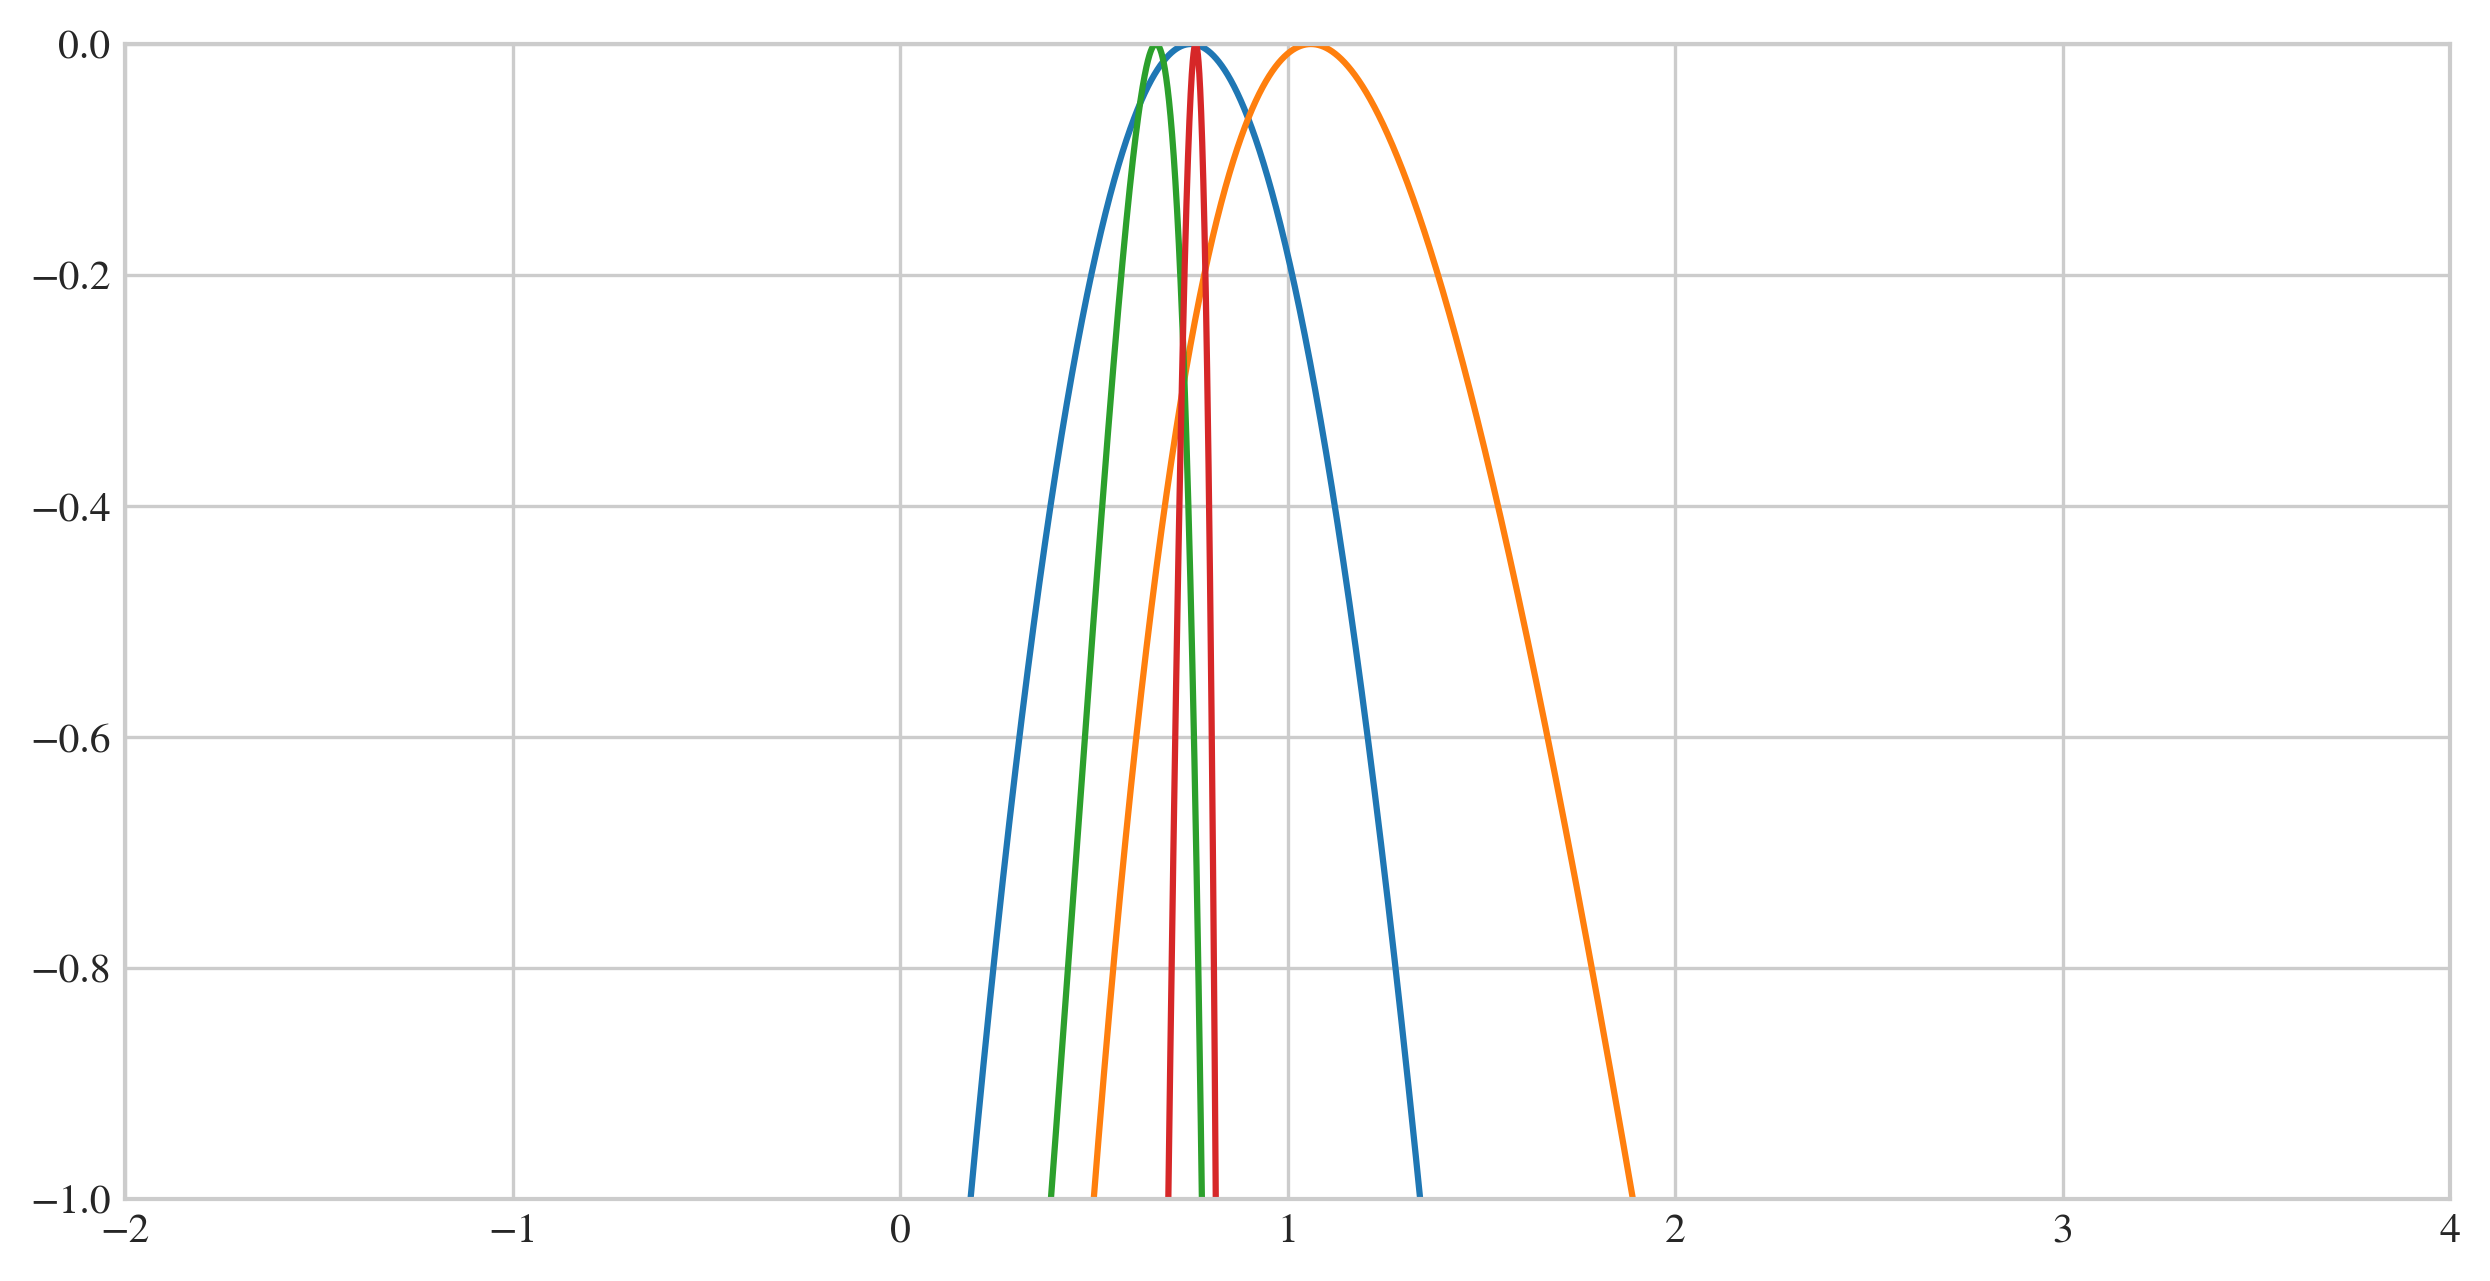

In [104]:

fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_subplot(111)
ax.plot(x,f1(x))
ax.plot(x,f2(x))
ax.plot(x,f3(x))
ax.plot(x,f1(x)+f2(x)+f3(x)+f4(x)+f5(x)+f6(x)+f7(x)+f8(x)+f9(x)+f10(x)+f11(x)+f12(x)+f13(x)+f14(x)+f15(x)+f16(x)+6.423180456973856)
ax.set_ylim(-1,0)
ax.set_xlim(-2,4)

In [108]:


np.argmax(f1(x)+f2(x)+f3(x)+f4(x)+f5(x)+f6(x)+f7(x)+f8(x)+f9(x)+f10(x)+f11(x)+f12(x)+f13(x)+f14(x)+f15(x)+f16(x))

44326

In [28]:
np.isclose(f1(x),-1/2)

array([False, False, False, ..., False, False, False])

In [105]:
# Edit this to change tolerance
np.where(np.abs(f1(x)+f2(x)+f3(x)+f4(x)+f5(x)+f6(x)+f7(x)+f8(x)+f9(x)+f10(x)+f11(x)+f12(x)+f13(x)+f14(x)+f15(x)+f16(x)+6.423180456973856- (-1/2))<=6e-4 )

(array([43960, 44621]),)

In [106]:
x[43960]

0.7148571485714852

In [107]:
x[44621]

0.8007880078800786

In [109]:
x[44326]

0.7624376243762434

In [ ]:
0.7624376243762434 + 0.8007880078800786 - 0.7148571485714852